In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.ML.Cluster import ClusterVis
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from sklearn.manifold import TSNE

In [2]:
compound_data=pd.read_csv("Enamine_hts_small.csv")

In [3]:
smiles_data=[]
for smiles in compound_data["SMILES"]:
    smiles_data.append(smiles)

In [4]:
def embedding(smiles):
    materials_data=[Chem.MolFromSmiles(x) for x in smiles]
    fingerprints=[Chem.RDKFingerprint(x) for x in materials_data]
    return fingerprints

In [5]:
def clustering(fp, cutoff=0.2):
    sim_matrix=[]
    for i in range(1,len(fp)):
        similarities = DataStructs.BulkTanimotoSimilarity(fp[i], fp[:i])
        sim_matrix.extend([1-x for x in similarities])
    clusters=Butina.ClusterData(sim_matrix,len(fp),cutoff,isDistData=True)
    clusters=sorted(clusters, key=len, reverse=True)
    return clusters

In [14]:
smiles_data=smiles_data[:10000]
fingerprints=embedding(smiles_data)
cluster=clustering(fingerprints,cutoff=0.4)

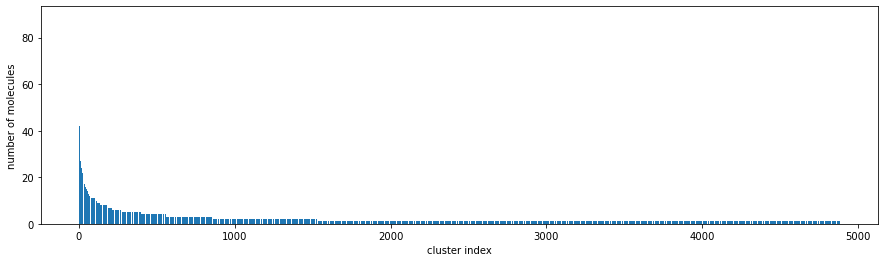

In [15]:
#see distribution to visualize the cluster
fig,ax=plt.subplots(figsize=(15,4))
ax.set_xlabel("cluster index")
ax.set_ylabel("number of molecules")
ax.bar(range(1,len(cluster)+1),[len(x) for x in cluster])
fig.savefig("cluster distribution.png",dpi=300,transparent=True)

In [17]:
model=TSNE(n_components=2)
Xt=model.fit_transform(fingerprints)

C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


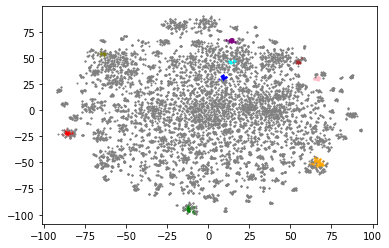

In [18]:
a1=[Xt[i,0] for i in cluster[0]]
a2=[Xt[i,1] for i in cluster[0]]
b1=[Xt[i,0] for i in cluster[1]]
b2=[Xt[i,1] for i in cluster[1]]
c1=[Xt[i,0] for i in cluster[2]]
c2=[Xt[i,1] for i in cluster[2]]
d1=[Xt[i,0] for i in cluster[3]]
d2=[Xt[i,1] for i in cluster[3]]
e1=[Xt[i,0] for i in cluster[4]]
e2=[Xt[i,1] for i in cluster[4]]
f1=[Xt[i,0] for i in cluster[5]]
f2=[Xt[i,1] for i in cluster[5]]
g1=[Xt[i,0] for i in cluster[6]]
g2=[Xt[i,1] for i in cluster[6]]
h1=[Xt[i,0] for i in cluster[7]]
h2=[Xt[i,1] for i in cluster[7]]
i1=[Xt[i,0] for i in cluster[8]]
i2=[Xt[i,1] for i in cluster[8]]

j1=[Xt[i,0] for i in cluster[9:]]
j1=np.concatenate(j1).tolist()
j2=[Xt[i,1] for i in cluster[9:]]
j2=np.concatenate(j2).tolist()

plt.scatter(a1,a2,color='orange',s=1)
plt.scatter(b1,b2,color='green',s=1)
plt.scatter(c1,c2,color='red',s=1)
plt.scatter(d1,d2,color='purple',s=1)
plt.scatter(e1,e2,color='brown',s=1)
plt.scatter(f1,f2,color='pink',s=1)
plt.scatter(g1,g2,color='blue',s=1)
plt.scatter(h1,h2,color='olive',s=1)
plt.scatter(i1,i2,color='cyan',s=1)
plt.scatter(j1,j2,color='gray',s=1)

plt.savefig("clustering visualization.png",dpi=300)
plt.show()